In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

## Given Data

In [2]:
# Data points
x_Cs = np.linspace(0.5, 4.9, 23)
x_Co = np.linspace(0.5, 9.9, 48)
x_unknown = np.linspace(0.1, 4.9, 25)

# Data points for finer plotting purposes
x2_Cs = np.linspace(0.5, 4.9, 200)
x2_Co = np.linspace(0.5, 9.9, 500)
x2_unknown = np.linspace(0.1, 4.9, 250)

data_Cs = np.array([6174,
7609,
6124,
4988,
4628,
4618,
4703,
3594,
1619,
1028,
3058,
13684,
16241,
2566,
143,
74,
50,
68,
59,
34,
47,
36,
25])

data_Co = np.array([1591,
1670,
1968,
1361,
1112,
1023,
962,
942,
924,
907,
928,
973,
976,
1018,
1066,
1054,
1103,
1067,
918,
819,
771,
929,
1560,
1773,
1032,
898,
1178,
1385,
1026,
324,
151,
93,
81,
76,
60,
62,
58,
70,
60,
51,
54,
48,
49,
34,
47,
68,
47,
29])

data_unknown = np.array([563,
662,
503,
387,
298,
199,
144,
109,
152,
149,
63,
60,
97,
76,
47,
26,
24,
36,
18,
22,
15,
18,
17,
19,
7])

## Analysis of Caesium

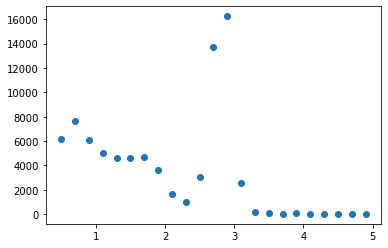

In [40]:
plt.scatter(x_Cs, data_Cs)
plt.show()

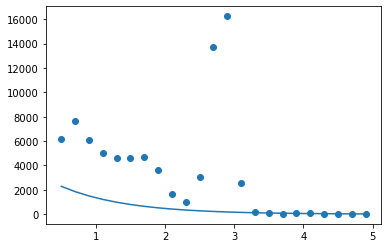

In [3]:
def single_peak(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/2/sigma**2)
def bg_exp(x, B, lmbda):
    return B*np.exp(-lmbda*x)

popt_exp_Cs, pcov_exp_Cs = curve_fit(bg_exp, x_Cs[14:], data_Cs[14:], p0 = [6000, 1])
perr_exp_Cs = np.sqrt(np.diag(pcov_exp_Cs))

plt.scatter(x_Cs, data_Cs)
plt.plot(x_Cs, bg_exp(x_Cs, *popt_exp_Cs))
plt.show()

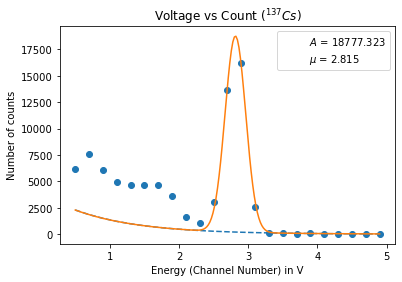

In [4]:
popt_gaus_Cs, pcov_gaus_Cs = curve_fit(single_peak, x_Cs[10:16], data_Cs[10:16] - bg_exp(x_Cs[10:16], *popt_exp_Cs))
perr_gaus_Cs = np.sqrt(np.diag(pcov_gaus_Cs))

plt.title('Voltage vs Count ($^{137}Cs$)')
plt.ylabel('Number of counts')
plt.xlabel('Energy (Channel Number) in V')

plt.scatter(x_Cs, data_Cs)
plt.plot(x_Cs, bg_exp(x_Cs, *popt_exp_Cs), '--')
plt.plot(x2_Cs, single_peak(x2_Cs, *popt_gaus_Cs) + bg_exp(x2_Cs, *popt_exp_Cs))
plt.plot([], [], ' ', label='$A$ = ' + str(np.round(popt_gaus_Cs[0] + bg_exp(popt_gaus_Cs[1], *popt_exp_Cs),3)))# + '$\pm$' + str(np.round(perr_gaus_Cs[0],3)))
plt.plot([], [], ' ', label='$\mu$ = ' + str(np.round(popt_gaus_Cs[1],3)))# + '$\pm$' + str(np.round(perr_gaus_Cs[1],3)))
plt.legend()
plt.show()

## Analysis of Cobalt

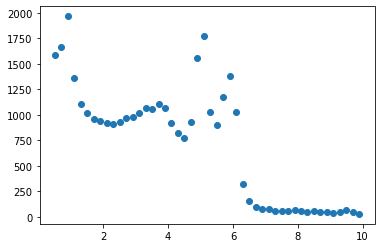

In [5]:
plt.scatter(x_Co, data_Co)
plt.show()

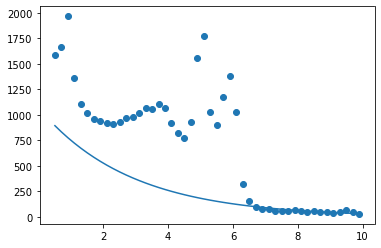

In [6]:
def double_peak(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return A1 * np.exp(-(x-mu1)**2/2/sigma1**2) + A2 * np.exp(-(x-mu2)**2/2/sigma2**2)

popt_exp_Co, pcov_exp_Co = curve_fit(bg_exp, x_Co[30:], data_Co[30:], p0 = [1500, 0.1])
perr_exp_Co = np.sqrt(np.diag(pcov_exp_Co))

plt.scatter(x_Co, data_Co)
plt.plot(x_Co, bg_exp(x_Co, *popt_exp_Co))
plt.show()

In [7]:
argrelextrema(data_Co, np.less)

(array([ 9, 15, 20, 25, 34, 36, 39, 41, 43]),)

In [8]:
data_Co[20]

771

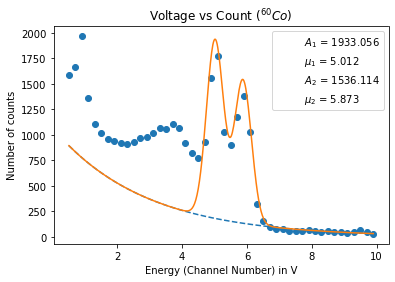

In [9]:
popt_gaus_Co, pcov_gaus_Co = curve_fit(double_peak, x_Co[21:30], data_Co[21:30] - bg_exp(x_Co[21:30], *popt_exp_Cs), p0 = [1250, 5, 0.08, 1200, 5.5, 0.08])
perr_gaus_Co = np.sqrt(np.diag(pcov_gaus_Co))

plt.title('Voltage vs Count ($^{60}Co$)')
plt.ylabel('Number of counts')
plt.xlabel('Energy (Channel Number) in V')

plt.scatter(x_Co, data_Co)
plt.plot(x_Co, bg_exp(x_Co, *popt_exp_Co), '--')
plt.plot(x2_Co, double_peak(x2_Co, *popt_gaus_Co) + bg_exp(x2_Co, *popt_exp_Co))
plt.plot([], [], ' ', label='$A_1$ = ' + str(np.round(popt_gaus_Co[0] + bg_exp(popt_gaus_Co[1], *popt_exp_Co),3)))# + '$\pm$' + str(np.round(perr_gaus_Co[0],3)))
plt.plot([], [], ' ', label='$\mu_1$ = ' + str(np.round(popt_gaus_Co[1],3)))# + '$\pm$' + str(np.round(perr_gaus_Co[1],3)))
plt.plot([], [], ' ', label='$A_2$ = ' + str(np.round(popt_gaus_Co[3] + bg_exp(popt_gaus_Co[4], *popt_exp_Co),3)))# + '$\pm$' + str(np.round(perr_gaus_Co[3],3)))
plt.plot([], [], ' ', label='$\mu_2$ = ' + str(np.round(popt_gaus_Co[4],3)))# + '$\pm$' + str(np.round(perr_gaus_Co[4],3)))
plt.legend()
plt.show()

## Analysis of Unknown Source

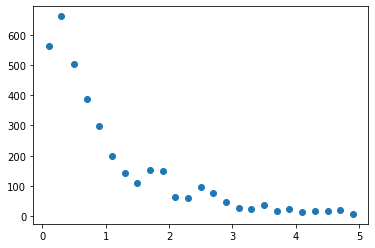

In [10]:
plt.scatter(x_unknown, data_unknown)
plt.show()

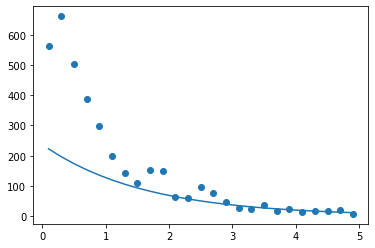

In [23]:
#def triple_peak(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3):
#    return A1 * np.exp(-(x-mu1)**2/2/sigma1**2) + A2 * np.exp(-(x-mu2)**2/2/sigma2**2) + \
#        A3 * np.exp(-(x-mu3)**2/2/sigma3**2)

popt_exp_unknown, pcov_exp_unknown = curve_fit(bg_exp, x_unknown[14:], data_unknown[14:], p0 = [600, 0.01])
#perr_exp_unknown = np.sqrt(np.diag(pcov_exp_unknown))

plt.scatter(x_unknown, data_unknown)
plt.plot(x_unknown, bg_exp(x_unknown, *popt_exp_unknown))
plt.show()

In [24]:
argrelextrema(data_unknown, np.less)

(array([ 7, 11, 16, 18, 20, 22]),)

In [43]:
popt_gaus_unknown3[0]+bg_exp(popt_gaus_unknown3[1], *popt_exp_unknown)

107.01662163689721

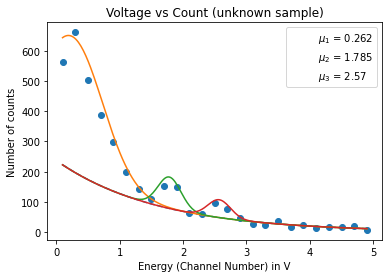

In [32]:
#popt_gaus_unknown, pcov_gaus_unknown = curve_fit(triple_peak, x_unknown[:17], data_unknown[:17] - bg_exp(x_Co[:17], *popt_exp_unknown), 
#                                                 p0 = [800, 0.5, 0.1, 100, 2, 0.1, 100, 2.7, 0.1])

popt_gaus_unknown1, pcov_gaus_unknown1 = curve_fit(single_peak, x_unknown[:8], data_unknown[:8] - bg_exp(x_Co[:8], *popt_exp_unknown), p0 = [800, 0.5, 0.08])
popt_gaus_unknown2, pcov_gaus_unknown2 = curve_fit(single_peak, x_unknown[7:12], data_unknown[7:12] - bg_exp(x_Co[7:12], *popt_exp_unknown), p0 = [100, 2, 0.08])
popt_gaus_unknown3, pcov_gaus_unknown3 = curve_fit(single_peak, x_unknown[11:17], data_unknown[11:17] - bg_exp(x_Co[11:17], *popt_exp_unknown), p0 = [100, 2.5, 0.08])

plt.title('Voltage vs Count (unknown sample)')
plt.ylabel('Number of counts')
plt.xlabel('Energy (Channel Number) in V')

plt.scatter(x_unknown, data_unknown)
plt.plot(x_unknown, bg_exp(x_unknown, *popt_exp_unknown), '--')
plt.plot(x2_unknown, single_peak(x2_unknown, *popt_gaus_unknown1) + bg_exp(x2_unknown, *popt_exp_unknown))
plt.plot(x2_unknown, single_peak(x2_unknown, *popt_gaus_unknown2) + bg_exp(x2_unknown, *popt_exp_unknown))
plt.plot(x2_unknown, single_peak(x2_unknown, *popt_gaus_unknown3) + bg_exp(x2_unknown, *popt_exp_unknown))

plt.plot([], [], ' ', label='$\mu_1$ = ' + str(np.round(popt_gaus_unknown1[1],3)))
plt.plot([], [], ' ', label='$\mu_2$ = ' + str(np.round(popt_gaus_unknown2[1],3)))
plt.plot([], [], ' ', label='$\mu_3$ = ' + str(np.round(popt_gaus_unknown3[1],3)))
plt.legend()

plt.show()

## Calibration Curve, FWHM and Energy Resolution Calculation

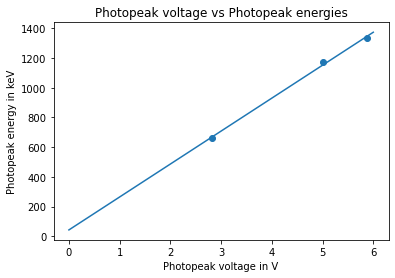

In [33]:
def lin_fit(x, m, c):
    return m*x + c

X = np.array([popt_gaus_Cs[1], popt_gaus_Co[1], popt_gaus_Co[4]]) #in V
Y = np.array([662, 1173.2, 1332.5]) #in keV

X2 = np.linspace(0,6)

popt_lin, pcov_lin = curve_fit(lin_fit, X, Y)

plt.title('Photopeak voltage vs Photopeak energies')
plt.xlabel('Photopeak voltage in V')
plt.ylabel('Photopeak energy in keV')
plt.scatter(X,Y)
plt.plot(X2, lin_fit(X2, *popt_lin))
plt.show()

In [34]:
peak_voltage_unknown = lin_fit(np.array([popt_gaus_unknown1[1], popt_gaus_unknown2[1], popt_gaus_unknown3[1]]), *popt_lin)
print('Peak Voltages of the three peaks in the unknown sample in keV', peak_voltage_unknown)

Peak Voltages of the three peaks in the unknown sample in keV [100.71627772 438.72246909 612.97213249]


In [35]:
# popt_gaus in V
# Converting to keV using calibration curve lin_fit

FWHM_Cs = lin_fit(2.3548*popt_gaus_Cs[2], *popt_lin)
FWHM_Co1 = lin_fit(2.3548*popt_gaus_Co[2], *popt_lin)
FWHM_Co2 = lin_fit(2.3548*popt_gaus_Co[5], *popt_lin)

FWHM_unknown = lin_fit(2.3548*np.array([popt_gaus_unknown1[2], popt_gaus_unknown2[2], popt_gaus_unknown3[2]]), *popt_lin)

In [48]:
FWHM_unknown

array([294.47097221, 138.22108729, 136.34456591])

In [37]:
E_res = np.ones(6)

E_res[0] = FWHM_Cs * 100 / Y[0]
E_res[1] = FWHM_Co1 * 100 / Y[1]
E_res[2] = FWHM_Co2 * 100 / Y[2]

E_res[3:] = FWHM_unknown * 100 / peak_voltage_unknown

In [38]:
print('Energy resolutions of all the peaks in all the sample in %', E_res)

Energy resolutions of all the peaks in all the sample in % [ 18.18903369  15.39158294  13.48899526 292.37674274  31.50535863
  22.2431916 ]


In [44]:
popt_lin

array([221.86761406,  42.69601978])